<a href="https://colab.research.google.com/github/kushum-coder/2501460_kushum/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ----------------------------
# Cell 1: Mount Google Drive & Load Dataset
# ----------------------------

# Import libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive to access CSV
drive.mount('/content/drive')

# Load diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/diabetes_.csv")

# Quick inspection
print("First 5 rows of the dataset:")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# ----------------------------
# Cell 2: Exploratory Data Analysis (EDA)
# ----------------------------

# Check dataset info
print("Dataset Info:")
df.info()

# Summary statistics
print("\nSummary statistics:")
df.describe()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Note: No missing values? If any, will handle in next step


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary statistics:

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                    

In [4]:
# ----------------------------
# Cell 3: Handle Missing Data
# ----------------------------

# Fill missing values with median (if any)
df = df.fillna(df.median())

# Verify missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# ----------------------------
# Cell 4: Feature Engineering & Train-Test Split
# ----------------------------
import numpy as np

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1).values  # assuming 'Outcome' is target
y = df['Outcome'].values

# Split manually: 70% train, 30% test
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split_idx = int(0.7 * X.shape[0])
train_idx = indices[:split_idx]
test_idx = indices[split_idx:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 537
Testing samples: 231


In [6]:
# ----------------------------
# Cell 5: KNN Implementation from Scratch
# ----------------------------
import math
from collections import Counter

# Function: Euclidean distance
def euclidean_distance(a, b):
    return math.sqrt(np.sum((a - b)**2))

# Function: Predict single sample
def predict_single(X_train, y_train, query, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = [y_train[i] for i in nearest_indices]
    most_common = Counter(nearest_labels).most_common(1)[0][0]
    return most_common

# Function: Predict all test samples
def predict_all(X_train, y_train, X_test, k=3):
    return np.array([predict_single(X_train, y_train, x, k) for x in X_test])

# Function: Accuracy calculation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Run KNN on original data
y_pred = predict_all(X_train, y_train, X_test, k=3)
acc = accuracy(y_test, y_pred)
print(f"Accuracy on original dataset with k=3: {acc*100:.2f}%")


Accuracy on original dataset with k=3: 70.13%


In [7]:
# ----------------------------
# Cell 6: Scale Features and Re-run KNN
# ----------------------------
from sklearn.preprocessing import StandardScaler

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Predict on scaled dataset
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k=3)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy on scaled dataset with k=3: {acc_scaled*100:.2f}%")

print("\nNote: Scaling features can improve KNN performance because distance-based models are sensitive to feature scales.")


Accuracy on scaled dataset with k=3: 69.70%

Note: Scaling features can improve KNN performance because distance-based models are sensitive to feature scales.


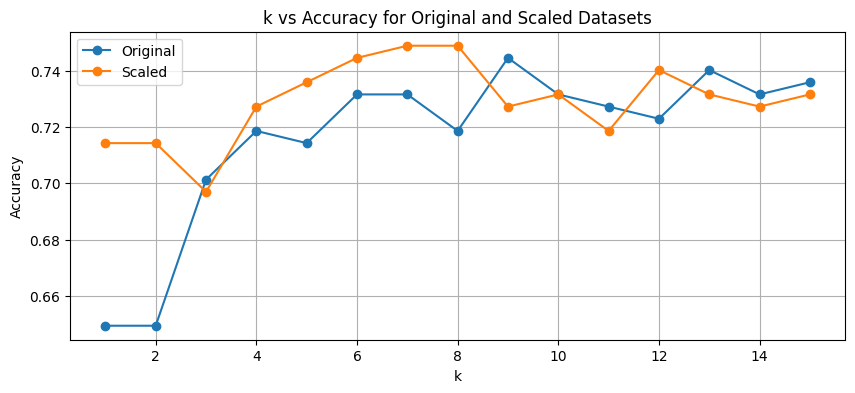

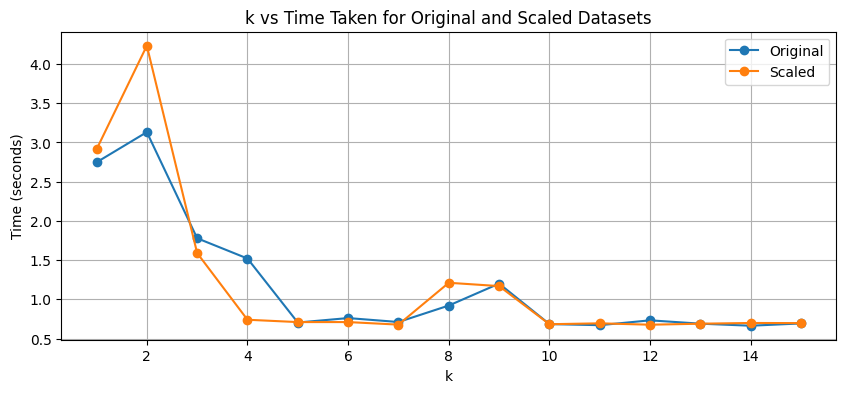

In [8]:
# ----------------------------
# Cell 7: Experiment with different k values
# ----------------------------
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracy_orig = []
accuracy_scaled = []
time_orig = []
time_scaled = []

for k in k_values:
    # Original data
    start = time.time()
    y_pred_k = predict_all(X_train, y_train, X_test, k)
    time_orig.append(time.time() - start)
    accuracy_orig.append(accuracy(y_test, y_pred_k))

    # Scaled data
    start = time.time()
    y_pred_k_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    time_scaled.append(time.time() - start)
    accuracy_scaled.append(accuracy(y_test, y_pred_k_scaled))

# Plot k vs Accuracy
plt.figure(figsize=(10,4))
plt.plot(k_values, accuracy_orig, marker='o', label='Original')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs Time Taken
plt.figure(figsize=(10,4))
plt.plot(k_values, time_orig, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# ----------------------------
# Cell 8: Optional Discussion
# ----------------------------

print("""
Challenges of using KNN on large or high-dimensional datasets:
1. KNN requires computing distances to all training points for every prediction, which is slow for large datasets.
2. In high dimensions, distance metrics may become less meaningful (curse of dimensionality).

Strategies to improve efficiency:
- Use Approximate Nearest Neighbors (e.x., KD-Tree, Ball Tree, Annoy)
- Reduce dimensionality using PCA or feature selection
- Scale features to ensure fair contribution to distance calculations
- Reduce dataset size via sampling or clustering techniques
""")



Challenges of using KNN on large or high-dimensional datasets:
1. KNN requires computing distances to all training points for every prediction, which is slow for large datasets.
2. In high dimensions, distance metrics may become less meaningful (curse of dimensionality).

Strategies to improve efficiency:
- Use Approximate Nearest Neighbors (e.x., KD-Tree, Ball Tree, Annoy)
- Reduce dimensionality using PCA or feature selection
- Scale features to ensure fair contribution to distance calculations
- Reduce dataset size via sampling or clustering techniques

